In [39]:
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy import odr
plt.rcParams["figure.figsize"]=10,5

In [40]:
def my_round(X , DX) :
    Ndecimal = np.int(np.ceil(np.abs(np.log10(DX))))
    DX = np.around( DX , Ndecimal )
    X = np.around( X , Ndecimal )
    return X , DX

def V2R(P,x) : 
    return P[0] * x**2 - P[1] * x**3

################ Viscosimètre à bille ! 

In [41]:
#Donnees EXP : 
L = 0.3    # Distance entre les marques pour mesures du temps de chute (m)
L_err = 0.0003
R = 0.04    # Rayon du Tube (m)
R_err = 0.0005
rho_bille = 7830 # Masse volumique bille (kg.m-3)
rho_fluide =  967 # Masse volumique fluide (kg.m-3)
g = 9.81 # accélération de pesanteur (m.s-2)


In [42]:
ls -lrt

total 9000
-rw-r--r--@ 1 Johany  staff   102979 Mar 25 16:45 Bilan_Microscopique.png
-rw-r--r--@ 1 Johany  staff    71868 Mar 25 17:09 Bilan_Microscopique.pdf
drwxr-xr-x@ 5 Johany  staff      160 Mar 26 14:15 image/
-rwxr-xr-x@ 1 Johany  staff  3407182 Mar 26 23:28 Diapo.key*
-rw-r--r--@ 1 Johany  staff    10167 Mar 27 11:21 Feuille_releve_viscosimetre.xlsx
-rw-r--r--@ 1 Johany  staff      977 Mar 27 11:24 Feuille_releve_viscosimetre.csv
-rw-r--r--  1 Johany  staff      948 Mar 27 11:24 rdy2go.txt
-rw-r--r--  1 Johany  staff   146651 Mar 27 12:03 LP04_Viscosimetre_a_bille.ipynb


In [43]:
# Formatage du fichier csv le cas echeant : 
catinit= open('Feuille_releve_viscosimetre.csv','r').read()
print (catinit)

r(mm),r_err,t(s),t_err,,,,,,,,,,,,
1,0.0125,20.5,0.5,,,,,,,,,,,,
1,0.0125,20.8,0.5,,,,,,,,,,,,
1,0.0125,21,0.5,,,,,,,,,,,,
1,0.0125,20.4,0.5,,,,,,,,,,,,
1,0.0125,20.3,0.5,,,,,,,,,,,,
1,0.0125,20,0.5,,,,,,,,,,,,
1,0.0125,20.2,0.5,,,,,,,,,,,,
1,0.0125,20.5,0.5,,,,,,,,,,,,
1,0.0125,20.6,0.5,,,,,,,,,,,,
0.75,0.0125,36.2,0.5,,,,,,,,,,,,
0.75,0.0125,36.1,0.5,,,,,,,,,,,,
0.75,0.0125,36.3,0.5,,,,,,,,,,,,
0.75,0.0125,36.2,0.5,,,,,,,,,,,,
0.75,0.0125,36.7,0.5,,,,,,,,,,,,
0.75,0.0125,35.5,0.5,,,,,,,,,,,,
0.75,0.0125,35.9,0.5,,,,,,,,,,,,
0.75,0.0125,36,0.5,,,,,,,,,,,,
0.75,0.0125,36.2,0.5,,,,,,,,,,,,
0.75,0.0125,36.4,0.5,,,,,,,,,,,,
0.5,0.0125,81.1,0.5,,,,,,,,,,,,
0.5,0.0125,81.2,0.5,,,,,,,,,,,,
0.5,0.0125,81.3,0.5,,,,,,,,,,,,
0.5,0.0125,81.2,0.5,,,,,,,,,,,,
0.5,0.0125,81.5,0.5,,,,,,,,,,,,
0.5,0.0125,81.7,0.5,,,,,,,,,,,,
0.5,0.0125,80.9,0.5,,,,,,,,,,,,
0.5,0.0125,80.4,0.5,,,,,,,,,,,,
0.5,0.0125,80.8,0.5,,,,,,,,,,,,
0.5,0.0125,80.7,0.5,,,,,,,,,,,,


In [44]:
catinit=catinit.replace(',',' ') #Delimiter 

cat = open('rdy2go.txt','w')
cat.write(catinit)
cat.close()

In [45]:
# Lecture du fichier Formate 
Cat = np.genfromtxt('rdy2go.txt',dtype=[('r',np.float) , ('r_err',np.float) , ('t',np.float) , ('t_err',np.float)],skip_header=1)
Cat['r'] = Cat['r']/1000.   # rayon en metre
Cat['r_err'] = Cat['r_err']/1000.


In [46]:
# Moyenne sur les mesures de billes identiques : 

Taille = np.unique(Cat['r'])

print(str(len(Taille))+' types de billes différentes utilisées : ')
print (Taille)

CAT = np.array([(1,2,3,4)],dtype=[('r',np.float) , ('r_err',np.float) , ('t',np.float) , ('t_err',np.float)])

for i in range(0,len(Taille)) : 
    t_mean = np.mean(Cat['t'][Cat['r']==Taille[i]])
    t_mean_err = np.mean(Cat['t_err'][Cat['r']==Taille[i]])/np.sqrt(len(Cat['t'][Cat['r']==Taille[i]]))
    r_mean_err = np.mean(Cat['r_err'][Cat['r']==Taille[i]])/np.sqrt(len(Cat['t'][Cat['r']==Taille[i]]))
    if i==0 : 
        CAT = np.array([(Taille[i],r_mean_err,t_mean,t_mean_err)],dtype=[('r',np.float) , ('r_err',np.float) , ('t',np.float) , ('t_err',np.float)])
    else : 
        ligne = np.array([(Taille[i],r_mean_err,t_mean,t_mean_err)],dtype=[('r',np.float) , ('r_err',np.float) , ('t',np.float) , ('t_err',np.float)])
        CAT = np.append(CAT,ligne)
        
print(CAT)


3 types de billes différentes utilisées : 
[0.0005  0.00075 0.001  ]
[(0.0005 , 3.95284708e-06, 81.08      , 0.15811388)
 (0.00075, 3.95284708e-06, 36.15      , 0.15811388)
 (0.001  , 4.16666667e-06, 20.47777778, 0.16666667)]


In [62]:
# Préparation des données pour ajustement : 

V = L / CAT['t']
V_err = V*np.sqrt((L_err/L)**2 + (CAT['t_err']/CAT['t'])**2 )

print (CAT['t_err'])
print (CAT['t'])
print ((L_err/L)**2)
print ((CAT['t_err']/CAT['t'])**2)
print(V)
print(V_err)

[0.15811388 0.15811388 0.16666667]
[81.08       36.15       20.47777778]
1e-06
[3.80287919e-06 1.91303716e-05 6.62417577e-05]
[0.00370005 0.00829876 0.01465003]
[8.10883281e-06 3.72339275e-05 1.20131793e-04]


In [63]:
## Ajustement des données par le modèle V = A*r^2 - B*r^3

myModel = odr.Model(V2R)
mydata = odr.RealData(x=CAT['r'],y=V,sx=CAT['r_err'],sy=V_err)

myodr = odr.ODR(mydata, myModel,beta0=[0., 0.])

myoutput = myodr.run()

print(myoutput.beta)
print(myoutput.sd_beta)
print('_______')



[ 14973.71452517 315338.81585699]
[5.92320725e+01 7.23883361e+04]
_______


[0.000375 0.000385 0.000395 0.000405 0.000415 0.000425 0.000435 0.000445
 0.000455 0.000465 0.000475 0.000485 0.000495 0.000505 0.000515 0.000525
 0.000535 0.000545 0.000555 0.000565 0.000575 0.000585 0.000595 0.000605
 0.000615 0.000625 0.000635 0.000645 0.000655 0.000665 0.000675 0.000685
 0.000695 0.000705 0.000715 0.000725 0.000735 0.000745 0.000755 0.000765
 0.000775 0.000785 0.000795 0.000805 0.000815 0.000825 0.000835 0.000845
 0.000855 0.000865 0.000875 0.000885 0.000895 0.000905 0.000915 0.000925
 0.000935 0.000945 0.000955 0.000965 0.000975 0.000985 0.000995 0.001005
 0.001015 0.001025 0.001035 0.001045 0.001055 0.001065 0.001075 0.001085
 0.001095 0.001105 0.001115]


<IPython.core.display.Javascript object>


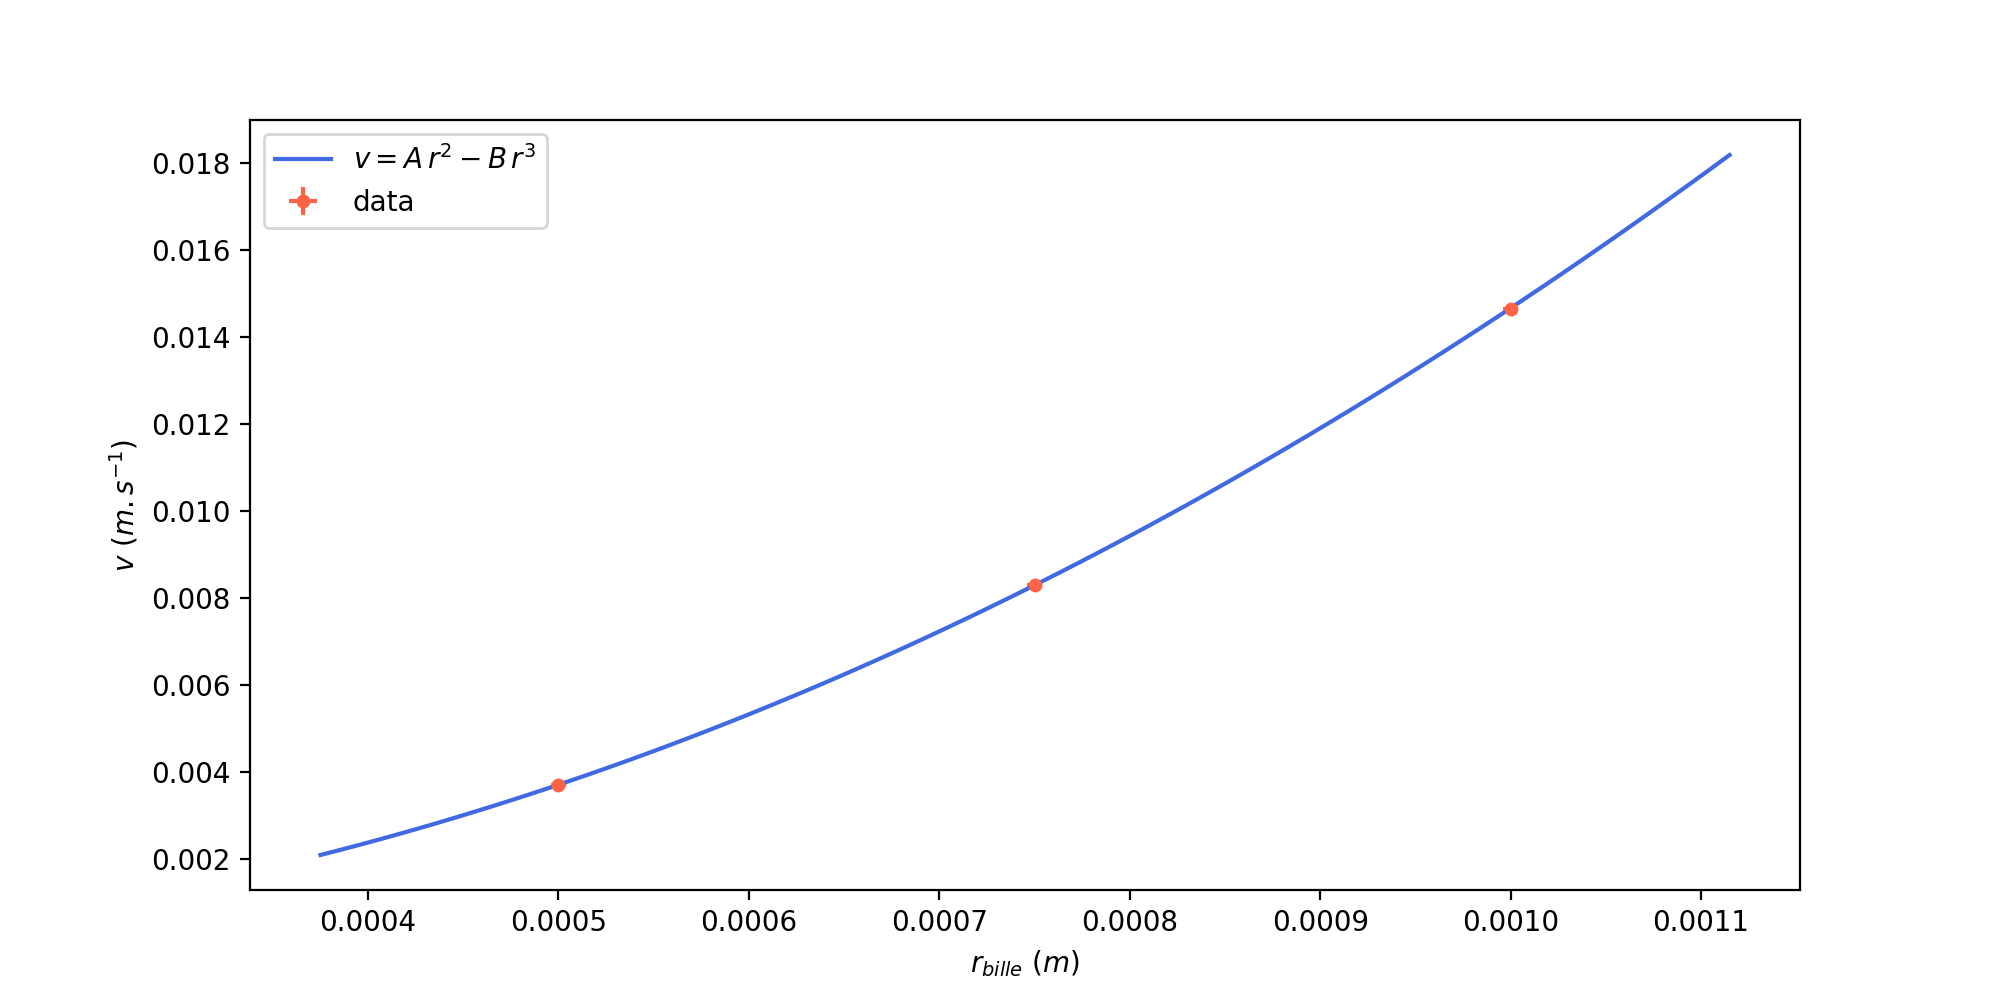

In [68]:
# Plot resultat : 

Xrange = 1.5*(np.max(Taille) - np.min(Taille))
Xmin = np.mean(Taille)-0.5*Xrange
Xmax = np.mean(Taille)+0.5*Xrange
X = np.arange(Xmin,Xmax,0.00001)

print(X)

%matplotlib notebook
plt.figure()

plt.xlabel('$r_{bille}\ (m)$')
plt.ylabel('$v \ (m.s^{-1})$')

plt.errorbar( CAT['r'] , V, xerr=CAT['r_err'] , yerr=V_err , color='tomato', fmt = 'o',markersize=4, label='data')
plt.plot (X, myoutput.beta[0]*X**2 - myoutput.beta[1]*X**3, 'royalblue', label='$v = A \, r^2 - B \, r^3$')



plt.legend()
plt.show()



In [72]:
#Calcul de la viscosité : A = (2/9) (g/eta) (rho_bille - rho_fluide)

myoutput.beta[0]
myoutput.sd_beta[0]

eta = (2./9.) * (g/myoutput.beta[0]) * (rho_bille - rho_fluide)

eta_err = eta * (myoutput.sd_beta[0]/myoutput.beta[0])

ETA_round = my_round(eta , eta_err)

print('la viscosité dynamique du fluide est : ')
print ('\N{greek small letter eta} = '+str(ETA_round[0])+' +/- '+str(ETA_round[1])+' Pa.s')


la viscosité dynamique du fluide est : 
η = 0.999 +/- 0.004 Pa.s


In [83]:
# Verification hypothèse stationnaire, calcul temps caratéristique régime transitoire : 

tau = 2.*rho_bille/(9.*eta) * CAT['r']**2 #* (1-2.1*CAT['r']/R)

print('Ce temps caractéristique vaut pour chaque bille :')
print('\n')

for i in range(0,len(Taille)) : 
    print('Pour la bille de rayon (r = '+str(CAT['r'][i]*1000.)+' mm) le temps est : \N{greek small letter tau} = '+str(tau[i])+' s soit une distance parcourue typique de : d = '+str(V[i]*tau[i]*100)+' cm')
    print('\n')


Ce temps caractéristique vaut pour chaque bille :


Pour la bille de rayon (r = 0.5 mm) le temps est : τ = 0.00043535978852481545 s soit une distance parcourue typique de : d = 0.0001610852695577758 cm


Pour la bille de rayon (r = 0.75 mm) le temps est : τ = 0.0009795595241808349 s soit une distance parcourue typique de : d = 0.000812912468199863 cm


Pour la bille de rayon (r = 1.0 mm) le temps est : τ = 0.0017414391540992618 s soit une distance parcourue typique de : d = 0.0025512130852240952 cm




In [88]:
# Calcul du nombre de Reynolds : 

Re = rho_fluide * V * CAT['r'] / eta

for i in range(0,len(Taille)) : 
    print('Pour la bille de rayon (r = '+str(CAT['r'][i]*1000.)+' mm) le nombre de Reynolds vaut Re = 10^'+str(np.log10(Re[i])))


Pour la bille de rayon (r = 0.5 mm) le nombre de Reynolds vaut Re = 10^-2.747036950358906
Pour la bille de rayon (r = 0.75 mm) le nombre de Reynolds vaut Re = 10^-2.220140252912803
Pour la bille de rayon (r = 1.0 mm) le nombre de Reynolds vaut Re = 10^-1.8483760404537022
